In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
sns.set(style="whitegrid")

___

# ***Coleta e tratamento dos dados***

In [43]:
# Fazendo o upload dos conjuntos de dados:
df_dados = pd.read_csv('dataset/data_2000_2019.csv', encoding='utf-8')
df_metadados = pd.read_csv('dataset/data_desc.csv', encoding='ISO-8859-1')

In [44]:
# Verificando as 5 primeiras e últimas linhas dos conjunto de dados
display(df_dados)
display(df_metadados)

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


,Variable,Long name,Description,Source
0,micro_code,Microregion code,Unique ID number given by IBGE to each microre...,Data from https://www.ibge.gov.br/geociencias/...
1,micro_name,Microregion name,Name of each microregion,Data from https://www.ibge.gov.br/geociencias/...
2,micro_name_ibge,Microregion name (IBGE sources),Name of each microregion (from IBGE sources),Data from https://www.ibge.gov.br/geociencias/...
3,meso_code,Mesoregion code,Unique ID number given by IBGE to each mesoreg...,Data from https://www.ibge.gov.br/geociencias/...
4,meso_name,Mesoregion name,Name of each mesoregion,Data from https://www.ibge.gov.br/geociencias/...
5,state_code,State code,Unique ID number given by IBGE to each state,Data from https://www.ibge.gov.br/geociencias/...
6,state_name,State name,Name of state,Data from https://www.ibge.gov.br/geociencias/...
7,region_code,Region code,Region code,Data from https://www.ibge.gov.br/geociencias/...
8,region_name,Region name,Region name,Data from https://www.ibge.gov.br/geociencias/...
9,biome_code,Biome code,Biome code,https://data.globalforestwatch.org/datasets/54...


In [45]:
df_dados.columns


Index(['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name',
       'state_code', 'state_name', 'region_code', 'region_name', 'biome_code',
       'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month',
       'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax',
       'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage'],
      dtype='object')

In [46]:
lista_variaveis = df_metadados.Variable.to_list()
lista_descricoes = df_metadados.Description.to_list()

print(lista_variaveis)
print(lista_descricoes)

['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name', 'state_code', 'state_name', 'region_code', 'region_name', 'biome_code', 'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month', 'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax', 'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage']
['Unique ID number given by IBGE to each microregion (5 digits)', 'Name of each microregion', 'Name of each microregion (from IBGE sources)', 'Unique ID number given by IBGE to each mesoregion (4 digits)', 'Name of each mesoregion', 'Unique ID number given by IBGE to each state', 'Name of state ', 'Region code', 'Region name', 'Biome code ', 'Biome name', 'Ecozone code (same as biome apart from Atlantic Rainforest, biome code 6, which has been separated into NE Atlantic rainforest, ecozone code 6, SE Atlantic Rainforest, ecozone code 7, and S Alantic Rainforest, ecozone code 8)', 'Ecozone name (same as biome apart from Atlantic Rainforest, which 

In [47]:
valor = 0
# Verificando a quantidade de colunas no df_dados, listando o nome e a descricao de cada uma
print(f"Temos {len(df_dados.columns)} colunas no conjunto de dados, conforme a seguir:")
for colunas in df_dados.columns:
    if colunas == lista_variaveis[valor]:
        print(f"{colunas}: {lista_descricoes[valor]}")
    valor = valor+1

Temos 26 colunas no conjunto de dados, conforme a seguir:
micro_code: Unique ID number given by IBGE to each microregion (5 digits)
micro_name: Name of each microregion
micro_name_ibge: Name of each microregion (from IBGE sources)
meso_code: Unique ID number given by IBGE to each mesoregion (4 digits)
meso_name: Name of each mesoregion
state_code: Unique ID number given by IBGE to each state
state_name: Name of state 
region_code: Region code
region_name: Region name
biome_code: Biome code 
biome_name: Biome name
ecozone_code: Ecozone code (same as biome apart from Atlantic Rainforest, biome code 6, which has been separated into NE Atlantic rainforest, ecozone code 6, SE Atlantic Rainforest, ecozone code 7, and S Alantic Rainforest, ecozone code 8)
ecozone_name: Ecozone name (same as biome apart from Atlantic Rainforest, which has been separated into NE Atlantic rainforest, SE Atlantic Rainforest, and S Alantic Rainforest)
main_climate: Most prevalent climate regime in the microregion.

**Descrição do conteúdo das colunas:**    
- *micro_code*: Unique ID number given by IBGE to each microregion (5 digits)
- *micro_name*: Name of each microregion
- *micro_name_ibge*: Name of each microregion (from IBGE sources)
- *meso_code*: Unique ID number given by IBGE to each mesoregion (4 digits)
- *meso_name*: Name of each mesoregion
- *state_code*: Unique ID number given by IBGE to each state
- *state_name*: Name of state 
- *region_code*: Region code
- *region_name*: Region name
- *biome_code*: Biome code 
- *biome_name*: Biome name
- *ecozone_code*: Ecozone code (same as biome apart from Atlantic Rainforest, biome code 6, which has been separated into NE Atlantic rainforest, ecozone code 6, SE Atlantic Rainforest, ecozone code 7, and S Alantic Rainforest, ecozone code 8)
- *ecozone_name*: Ecozone name (same as biome apart from Atlantic Rainforest, which has been separated into NE Atlantic rainforest, SE Atlantic Rainforest, and S Alantic Rainforest)
- *main_climate*: Most prevalent climate regime in the microregion. Based on Koppen Geiger climate regimes
- *month*: Calendar month index, 1 = January, É, 12 = December
- *year*: Year 2000 - 2019
- *time*: Time index starting at 1 for January 2000
- *dengue_cases*: Number of notified dengue cases registered in the notifiable diseases system in Brazil (SINAN) in the microregion of reference, at the month of first symptoms
- *population*: Estimated population, based on projections calculated using the 2000 and 2010 censuses, and counts carried out in 2007 and 2017
- *pop_density*: Population density (number of people per km2)
- *tmax*: Monthly average daily maximum temperature; gridded values (at a 0.5¡ resolution) averaged across each microregion using the 'exactextratr' R package (¡C)
- *tmin*: Monthly average daily minimum temperature; gridded values (at a 0.5¡ resolution) averaged across each microregion using the 'exactextratr' R package (¡C)
- *pdsi*: Self-calibrated Palmer drought severity index for each microregion (a measure of how wet or dry a region is relative to usual conditions). Negative values represent periods of drought, positive values represent wetter periods. Calculated by taking the mean value within each microregion using the exact_extract R package
- *urban*: Percentage of inhabitants living in urban areas according to the 2010 census
- *water_network*: Percentage of inhabitants with access to the piped water network according to the 2010 census
- *water_shortage*: Frequency of reported water shortages per microregion between 2000 - 2016

In [48]:
# Excluindo colunas que não serão utilizadas nas análises posteriores
df_dados_limpo = df_dados.drop(["micro_code","micro_name", "meso_code", "region_code", "biome_code", "ecozone_code","time", "population","pop_density"], axis=1)

# Verificando as 5 primeiras e últimas linhas do novo conjunto de dados
display(df_dados_limpo)

,micro_name_ibge,meso_name,state_code,state_name,region_name,biome_name,ecozone_name,main_climate,month,year,dengue_cases,tmax,tmin,pdsi,urban,water_network,water_shortage
0,PORTO VELHO,Madeira-Guaporé,11,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Madeira-Guaporé,11,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,ARIQUEMES,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,JI-PARANÁ,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,MEIA PONTE,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,111.0,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,PIRES DO RIO,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,42.0,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,CATALÃO,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,57.0,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,41.0,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


In [49]:
df_dados_limpo.loc[df_dados_limpo['micro_name_ibge'] == 'QUIRINÓPOLIS']

,micro_name_ibge,meso_name,state_code,state_name,region_name,biome_name,ecozone_name,main_climate,month,year,dengue_cases,tmax,tmin,pdsi,urban,water_network,water_shortage
556,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,1,2000,NaN,31.781157,21.300638,-1.825836,85.36,77.39,0.4802
1114,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,2,2000,NaN,31.994915,21.124794,-0.947020,85.36,77.39,0.4802
1672,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,3,2000,NaN,31.824282,20.774422,-0.629938,85.36,77.39,0.4802
2230,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,4,2000,NaN,31.346298,19.787325,-1.619842,85.36,77.39,0.4802
2788,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,5,2000,NaN,30.181074,17.675838,-2.044788,85.36,77.39,0.4802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131686,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,8,2019,17.0,32.961315,17.533852,-2.300592,85.36,77.39,0.4802
132244,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,9,2019,6.0,34.323769,20.547247,-2.490653,85.36,77.39,0.4802
132802,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,10,2019,11.0,35.376747,22.970676,-2.941710,85.36,77.39,0.4802
133360,QUIRINÓPOLIS,Sul Goiano,52,Goiás,Centre-West,Cerrado,Cerrado,AW,11,2019,30.0,33.523598,22.443357,-3.310134,85.36,77.39,0.4802


In [50]:
# Verificando o tamanho do conjunto de dados

df_dados_limpo.shape

(133920, 17)

In [51]:
# Verificando se existem duplicatas

duplicatas = df_dados_limpo.duplicated()
duplicatas.sum()

0

In [52]:
# Verificando se existem valores nulos e quais são os tipos de dados de cada coluna do conjunto

df_dados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133920 entries, 0 to 133919
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   micro_name_ibge  133920 non-null  object 
 1   meso_name        133920 non-null  object 
 2   state_code       133920 non-null  int64  
 3   state_name       133920 non-null  object 
 4   region_name      133920 non-null  object 
 5   biome_name       133920 non-null  object 
 6   ecozone_name     133920 non-null  object 
 7   main_climate     133920 non-null  object 
 8   month            133920 non-null  int64  
 9   year             133920 non-null  int64  
 10  dengue_cases     127224 non-null  float64
 11  tmax             133920 non-null  float64
 12  tmin             133920 non-null  float64
 13  pdsi             133680 non-null  float64
 14  urban            133920 non-null  float64
 15  water_network    133920 non-null  float64
 16  water_shortage   133920 non-null  floa

- Podemos notar que o conjunto de dados possui 133920 linhas, porem:
    - a coluna *dengue_cases* possui 127224 registros;
    - a coluna *pdsi* possui 133680 registros.

- Com isso, vamos verificar quais sao os valores faltantes.

In [53]:
missing_values = df_dados_limpo.isnull().sum()
print(missing_values)

micro_name_ibge       0
meso_name             0
state_code            0
state_name            0
region_name           0
biome_name            0
ecozone_name          0
main_climate          0
month                 0
year                  0
dengue_cases       6696
tmax                  0
tmin                  0
pdsi                240
urban                 0
water_network         0
water_shortage        0
dtype: int64


Conforme resultado, realmente possuimos valores nulos nas colunas *dengue_cases* e *pdsi*

- Para *dengue_cases*: vou considerar casos nulos como 0, assumindo que a ausência desse registro pode significar 0 casos reportados;
- Para *pdsi*: vou substituir os valores nulos com o valor médio da coluna.

In [54]:
# Tratamento da coluna 'dengue_cases'
df_dados_limpo['dengue_cases'] = df_dados_limpo['dengue_cases'].fillna(0)

# Tratamento da coluna 'pdsi'
media_pdsi = df_dados_limpo['pdsi'].mean()
df_dados_limpo['pdsi'] = df_dados_limpo['pdsi'].fillna(media_pdsi)

# Verificando novamente a presença de valores faltantes após o tramento
missing_values_fill = df_dados_limpo.isnull().sum()

print(missing_values_fill)

micro_name_ibge    0
meso_name          0
state_code         0
state_name         0
region_name        0
biome_name         0
ecozone_name       0
main_climate       0
month              0
year               0
dengue_cases       0
tmax               0
tmin               0
pdsi               0
urban              0
water_network      0
water_shortage     0
dtype: int64


In [55]:
# Alterando o tipo do campo dengue_cases de Float para Int
df_dados_limpo.dengue_cases = df_dados_limpo.dengue_cases.astype('int64')

df_dados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133920 entries, 0 to 133919
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   micro_name_ibge  133920 non-null  object 
 1   meso_name        133920 non-null  object 
 2   state_code       133920 non-null  int64  
 3   state_name       133920 non-null  object 
 4   region_name      133920 non-null  object 
 5   biome_name       133920 non-null  object 
 6   ecozone_name     133920 non-null  object 
 7   main_climate     133920 non-null  object 
 8   month            133920 non-null  int64  
 9   year             133920 non-null  int64  
 10  dengue_cases     133920 non-null  int64  
 11  tmax             133920 non-null  float64
 12  tmin             133920 non-null  float64
 13  pdsi             133920 non-null  float64
 14  urban            133920 non-null  float64
 15  water_network    133920 non-null  float64
 16  water_shortage   133920 non-null  floa

In [56]:
# Verificando os dados estatísticos do conjunto de dados (registros, média, valor mínimo e máximo, etc)
df_dados_limpo.describe()

,state_code,month,year,dengue_cases,tmax,tmin,pdsi,urban,water_network,water_shortage
count,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000
mean,31.302867,6.500000,2009.500000,96.291017,29.417284,18.980845,-0.459147,72.098190,72.286989,0.357296
std,10.385255,3.452065,5.766303,946.859279,3.461089,3.644395,1.905470,16.630274,17.021309,0.240645
min,11.000000,1.000000,2000.000000,0.000000,14.425291,4.615391,-7.634145,22.300000,16.680000,0.000000
25%,24.000000,3.750000,2004.750000,0.000000,27.555401,16.923784,-1.747564,58.390000,62.680000,0.160100
50%,31.000000,6.500000,2009.500000,4.000000,30.162950,19.892204,-0.562458,72.750000,74.875000,0.325850
75%,41.000000,9.250000,2014.250000,26.000000,31.774971,21.770352,0.714378,86.680000,85.700000,0.531700
max,53.000000,12.000000,2019.000000,88821.000000,37.885544,25.765200,7.479940,100.000000,98.810000,1.000000


___

# ***Análise Exploratória dos dados***

***1* - Como o número de casos registrados evoluiu ao longo do tempo dentro do período de 2000 a 2019?**

In [57]:
# Verificando qual o ano com o maior número de casos registrados
data_ano = df_dados_limpo.loc[:,["year", "dengue_cases"]]
data_ano = data_ano.groupby("year").sum()

maior_num_casos = data_ano['dengue_cases'].max()
menor_num_casos = data_ano['dengue_cases'].min()

ano_maior = data_ano[data_ano['dengue_cases'] == maior_num_casos].index[0]
ano_menor = data_ano[data_ano['dengue_cases'] == menor_num_casos].index[0]

print(f"O ano com o maior número de casos de dengue é {ano_maior} com {maior_num_casos} casos.")
print(f"O ano com o maior número de casos de dengue é {ano_menor} com {menor_num_casos} casos.")

O ano com o maior número de casos de dengue é 2015 com 1700248 casos.
O ano com o maior número de casos de dengue é 2000 com 0 casos.


In [41]:
# Coluna 'year_month' combinando 'year' e 'month'
df_dados_limpo['year_month'] = df_dados_limpo['year'].astype(str) + '-' + df_dados_limpo['month'].astype(str).str.zfill(2)

# Agrupamento por 'year_month' e somar os casos de dengue, especificando numeric_only=True
df_ano_mes = df_dados_limpo.groupby('year_month').sum(numeric_only=True)

# Encontra o maior número de casos de dengue
mes_maior_casos = df_ano_mes['dengue_cases'].max()

# Encontrar a data correspondente ao maior número de infectados
mes_maior = df_ano_mes[df_ano_mes['dengue_cases'] == mes_maior_casos].index[0]

print(f"O mês com o maior número de casos de dengue é {mes_maior} com {mes_maior_casos} casos.")

O mês com o maior número de casos de dengue é 2013-03 com 424700 casos.


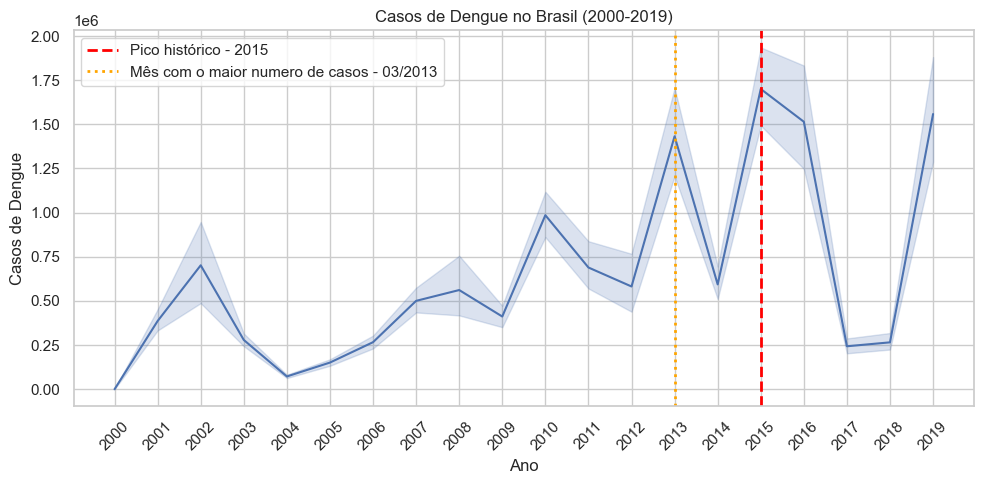

In [61]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_dados_limpo, x='year', y='dengue_cases', estimator='sum')

plt.axvline(x=2015, color='red', linestyle='dashed', lw=2, label='Pico histórico - 2015')
plt.axvline(x=2013, color='orange', linestyle='dotted', lw=2, label='Mês com o maior numero de casos - 03/2013')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(1))

plt.title('Casos de Dengue no Brasil (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('Casos de Dengue')
plt.legend()
plt.tight_layout()
plt.show()

***2* - Quais são as regiões do país mais afetadas pela doença?**

In [66]:
# Agrupa o dataset por 'region_name' e soma os casos de dengue
casos_regiao = df_dados_limpo.groupby('region_name')['dengue_cases'].sum().reset_index()

# Ordena os resultados em ordem decrescente de casos de dengue
casos_regiao = casos_regiao.sort_values('dengue_cases', ascending=False)

# Mostra a região com mais casos
regiao_mais_casos = casos_regiao.iloc[0]

print(f"A região com o maior número de casos de dengue é {regiao_mais_casos['region_name']}, com {regiao_mais_casos['dengue_cases']} casos")

A região com o maior número de casos de dengue é Southeast, com 6697802 casos


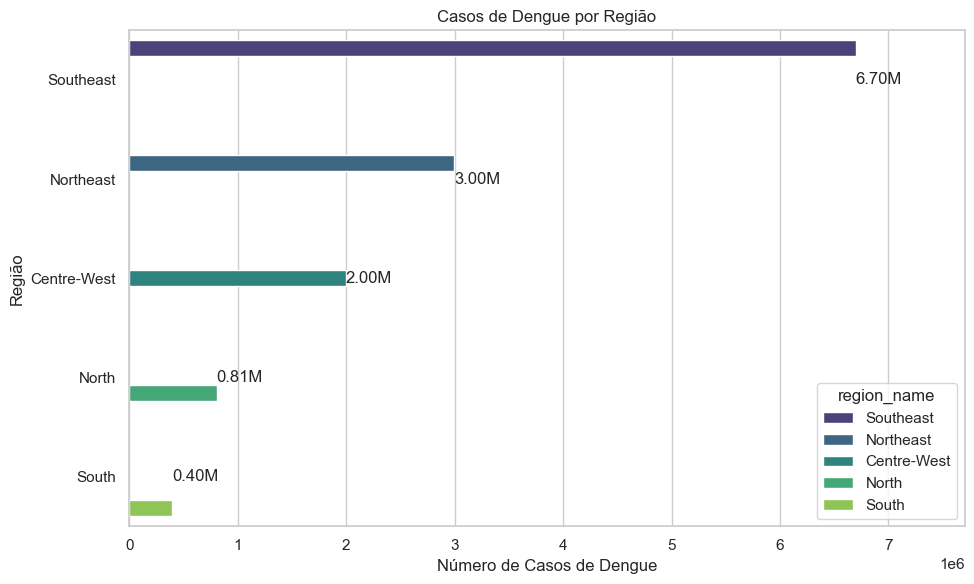

In [85]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dengue_cases', y='region_name', hue='region_name', data=casos_regiao, palette='viridis')

for index, value in enumerate(casos_regiao['dengue_cases']):
    plt.text(value, index, f'{value/1_000_000:.2f}M', va='center')

plt.title('Casos de Dengue por Região')
plt.xlabel('Número de Casos de Dengue')
plt.ylabel('Região')
plt.tight_layout()

max_cases = casos_regiao['dengue_cases'].max()
plt.xlim(0, max_cases * 1.15)  # ajustando o eixo x para caber a informação de 6.7M

plt.show()